# Machine Learning (laboratory instruction)
## Linear regression (part 6)

### Submission

<u>Submission:</u>

Compress all files into **single zip** archive and submit via Wikamp. See below the content of the archive (replace the `name` and `surname` with proper values):
```
📂 name.surname.zip
+-- 📜 02-Linear regression (part 6).ipynb
+-- 🖼 dataset.npz
```

<u>Grades</u>

| Percentage of all points | mark |
| :----                    | ---: |
| [0-50)   | 2   |
| [50-60)  | 3   |
| [60-70)  | 3.5 |
| [70-80)  | 4   |
| [80-90)  | 4.5 |
| [90-100] | 5   |

<u>Penalties</u>

* `mark - 0.5` if tasks are submitted after laboratory (but less than 7 days); 
* `mark - 1` if tasks are submitted after one week (>=7 days but < 14 days);
* `mark - 1.5` if tasks are submitted later than two weeks (>=14 days).

<u>Warning:</u>

It is NOT allowed to share your .ipynb file with other students nor Internet. All students should download the exercise files directly from WIKAMP. Group work is considered as plagiarism.

<u>Plagiarism Disclaimer:</u>

I hereby declare that this exercise is my own and autonomous work. I am aware of the consequences and I am familiar with the university regulations.

### The goal
There are two goals of this laboratory:

1. Normalization,
2. Feature engineering,
3. L2 regularization (Ridge regression).

### Task 1. Read the dataset from file.
Read the data from `reg.npz` file. This is a univariate data with some anomalies. Display the data to see what happens. The dataset is divided into two subsets:
* training dataset - the dataset for model training
* testing dataset - the dataset for testing

**Tip**: You can use below code to read the data:

```python
with open('reg.npz', 'rb') as f:
    data = np.load(f)
    x_train, y_train, x_test, y_test = data['x_train'], data['y_train'], data['x_test'], data['y_test']
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt

with open('reg.npz', 'rb') as f:
    data = np.load(f)
    x_train, y_train, x_test, y_test = data['x_train'], data['y_train'], data['x_test'], data['y_test']

### Task 2. Data preprocessing.

#### Task 2.1. Data normalization.

There are a multiple methods of data normalization. In this task normalize the data using min-max scaler.

$$
X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}}
$$

**Tip**: In this task you can use [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) from scikit-learn library.

In [2]:
from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# x_train_norm = MinMaxScaler((x_train.reshape(-1,1)))
# x_test_norm = MinMaxScaler((x_test.reshape(-1,1)))

x_train_scaled = (x_train - x_train.min(axis=0)) / (x_train.max(axis=0) - x_train.min(axis=0))
x_test_scaled = (x_test - x_test.min(axis=0)) / (x_test.max(axis=0) - x_test.min(axis=0))

#### Task 2.2. Features engineering.

Generate new polynomial features of degree 2 (you can experiment with other numbers also). For univariate data, a single feature $a$ the following features should be returned:

| Degree | Features |
| :----  | :---     |
| 1      | 1, $a$   |
| 2      | 1, $a$, $a^2$   |
| 3      | 1, $a$, $a^2$, $a^3$ |
| ...    | ... |
| n    | 1, $a$, $a^2$, ..., $a^n$ |

**Tip**: You can use [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) function for this purpose.

In [3]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
x_train_prepared = poly.fit_transform(x_train_scaled.reshape(-1,1))
x_test_prepared = poly.fit_transform(x_test_scaled.reshape(-1,1))

### Task 3. Train linear regression model.

Train the linear regression model that you implemented on previous laboratories using preprocessed data and display the result (show the line of the function along with the training data and test data at the same chart - use different colours).

Display the loss for both training and testing data in function of number of epochs.

It is very likely that you will observe overfitting.



In [4]:
# >>> WRITE YOUR CODE BELOW <<<
def fun(weight, x):
    weights = []
    for i in range(len(x)):
        weights.append(weight.T @ x[i])
    return weights

# Defining gradient
def gradient(weight, alpha, x, y):
    grad = 2/len(y)*x.T @ (fun(weight, x) - y)
    return weight-alpha*grad

# Defining an array of steps for weight calculation
def step(weight, epochs, alpha, x, y):
    step_list = []
    for i in range(epochs):
        step_list.append(weight)
        weight = gradient(weight, alpha, x, y)
    return step_list

# Defining linear regression function
def linear_regression(weight, epoch, alpha, x, y):
    weight_value = step(weight, epoch, alpha, x, y)
    return weight_value

def loss(weight_value, x, y):
    loss = []
    for i in range (epochs):
        diff = y - fun(weight_value[i], x)
        diff = diff**2
        diff_sum = diff.sum()
        loss.append(diff_sum/len(y))
    return loss

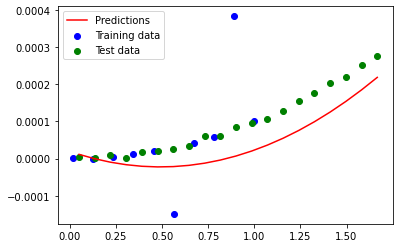

In [5]:
start_weight = np.zeros(len(x_train_prepared[0]))
alpha = 0.005
epochs = 50000

weight_value = linear_regression(start_weight, epochs, alpha, x_train_prepared, y_train)
final_weight = weight_value[-1]

predictions = fun(final_weight, x_test_prepared)

plt.scatter(x_train, y_train, color = "blue", label = "Training data")
plt.scatter(x_test, y_test, color = "green", label = "Test data")
plt.plot(x_test, predictions, color = "red", label = "Predictions")
plt.legend()
plt.show()

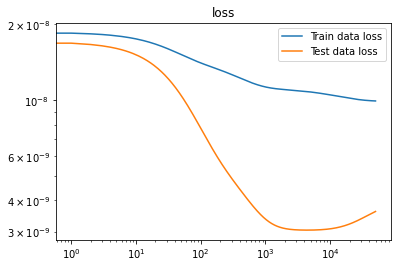

In [6]:
train_data_loss = loss(weight_value, x_train_prepared, y_train)
test_data_loss = loss(weight_value, x_test_prepared, y_test)

plt.xscale("log")
plt.yscale("log")
plt.title("loss")
plt.plot(range(epochs), train_data_loss, label = "Train data loss")
plt.plot(range(epochs), test_data_loss, label = "Test data loss")
plt.legend()
plt.show()

### Task 4. Regularization.

In the previous task, you noticed that the predictions do not generalize very well to test data. This is the case when we do NOT want to fit the training data perfectly. If the values of the weights are high, then the function tends to overfit (the slope is steep), but if we reduce the weights ($\theta$) then the function will be less sensitive to noise or anomalies (the slope is smaller). To make the weight values smaller, we can add a penalty to loss function $\lambda \sum \theta_j^2$, where $\lambda$ is the size of the penalty. It is a L2 norm (regression) penalty.

**Task**: Your task is to:
1. implement (add L2 regularization to your previous implementation) ridge regression,
2. train the model,
3. empirically choose $\lambda$ that looks optimal in your opinion,
3. display the results.

*Note: There are a few options to choose from for regularization. The most popular (and available in popular AI libraries) are L1 (lasso) and L2 (ridge) regularizations.*

Considering the L2 norm, the cost function becomes now:

$$
\begin{equation*}
MSE = \frac{1}{m}\sum(\theta^Tx^{(i)} - y^{(i)})^2 + \lambda ||\theta||^2
\end{equation*}
$$

And the partial derivatives can be calculated as follows:

$$
\begin{equation*}
\frac{\partial}{\partial\theta_j}MSE = \frac{2}{m}\sum(\theta^Tx^{(i)} - y^{(i)})x_j^{(i)} + 2\lambda\theta
\end{equation*}
$$

Now, we can define the gradient:

$$
\begin{equation*}
\nabla = \frac{2}{m}x^T(X\theta - y) + 2\lambda\theta
\end{equation*}
$$

Example:

<!--div style="display: flex; justify-content: center; align-items: center;">
    <div style="width: 60%; display: flex; justify-content: center; align-items: center;">
        <img src="02.06.noreg_f.png" style="width: 30%; float: left;"/>
        <img src="02.06.noreg_f.png" style="width: 30%; float: right;"/>
    </div>
</div>
<div>
    <div></div><div></div>
</div-->

<div style="width: 70%; margin: auto;">
<table>
    <tr>
        <td>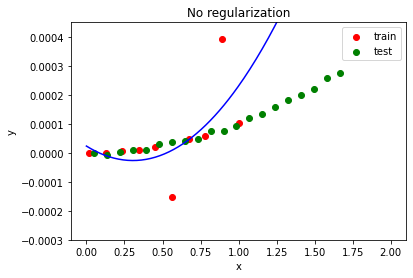</td>
        <td>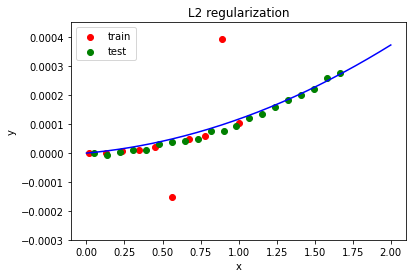</td>
    </tr>
    <tr>
        <td>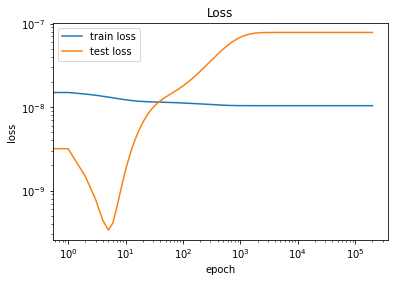</td>
        <td>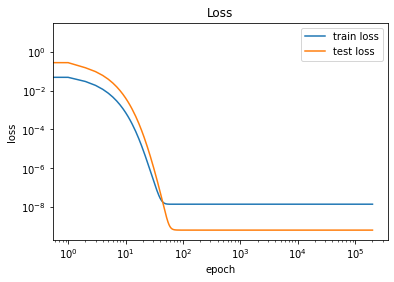</td>
    </tr>
</table>
</div>


In [7]:
# Defining gradient with regularization
def gradient_reg(weight, alpha, x, y, l):
    grad = 2/len(y)*x.T @ (fun(weight, x) - y) + 2*l*weight
    return weight-alpha*grad

# Defining an array of steps for weight calculation with lambda for regularization
def step_reg(weight, epochs, alpha, x, y, l):
    step_list = []
    for i in range(epochs):
        step_list.append(weight)
        weight = gradient_reg(weight, alpha, x, y, l)
    return step_list

# Defining linear regression function with regularization
def linear_regression_reg(weight, epoch, alpha, x, y, l):
    weight_value = step_reg(weight, epoch, alpha, x, y, l)
    return weight_value

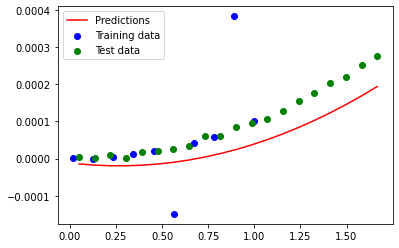

In [8]:
start_weight = np.zeros(len(x_train_prepared[0]))
alpha = 0.005
epochs = 50000
l = 0.005

weight_value_reg = linear_regression_reg(start_weight, epochs, alpha, x_train_prepared, y_train, l)
final_weight_reg = weight_value_reg[-1]

predictions_reg = fun(final_weight_reg, x_test_prepared)

plt.scatter(x_train, y_train, color = "blue", label = "Training data")
plt.scatter(x_test, y_test, color = "green", label = "Test data")
plt.plot(x_test, predictions_reg, color = "red", label = "Predictions")
plt.legend()
plt.show()

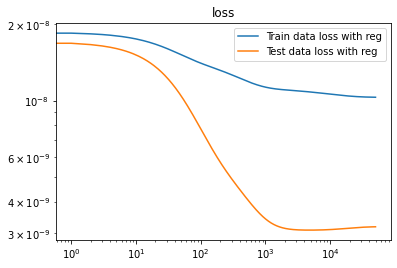

In [9]:
train_data_loss_reg = loss(weight_value_reg, x_train_prepared, y_train)
test_data_loss_reg = loss(weight_value_reg, x_test_prepared, y_test)

plt.xscale("log")
plt.yscale("log")
plt.title("loss")
plt.plot(range(epochs), train_data_loss_reg, label = "Train data loss with reg")
plt.plot(range(epochs), test_data_loss_reg, label = "Test data loss with reg")
plt.legend()
plt.show()